Loaded data from local file: ./dataset/final_datasets/item_1_test.parquet
First few rows of the data:
        date  item_code     price
0 2024-01-01          1  9.276044
1 2024-01-02          1  9.284652
2 2024-01-03          1  9.297564
3 2024-01-04          1  9.311141
4 2024-01-05          1  9.298205
Converted 'date' column to datetime format.


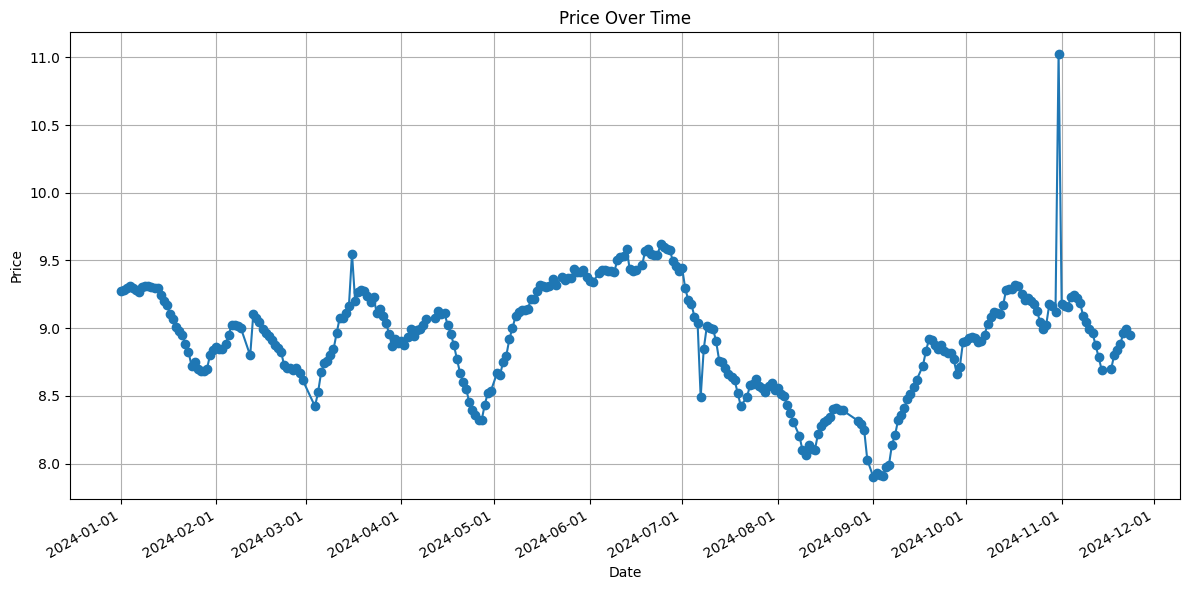

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import requests
from io import BytesIO
import sys

def install_packages():
    """
    Install required packages if they are not already installed.
    """
    try:
        import pandas
        import matplotlib
        import pyarrow
        import requests
    except ImportError:
        import subprocess
        import sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "matplotlib", "pyarrow", "requests"])

def load_parquet(file_path=None, url=None):
    """
    Load a Parquet file from a local path or a URL.

    Parameters:
    - file_path: str, path to the local Parquet file.
    - url: str, URL to the Parquet file.

    Returns:
    - df: pandas DataFrame containing the loaded data.
    """
    if file_path:
        try:
            df = pd.read_parquet(file_path)
            print(f"Loaded data from local file: {file_path}")
            return df
        except Exception as e:
            print(f"Error loading Parquet file from {file_path}: {e}")
            sys.exit(1)
    elif url:
        try:
            response = requests.get(url)
            response.raise_for_status()
            file_like = BytesIO(response.content)
            df = pd.read_parquet(file_like)
            print(f"Loaded data from URL: {url}")
            return df
        except Exception as e:
            print(f"Error loading Parquet file from URL {url}: {e}")
            sys.exit(1)
    else:
        print("Error: Either file_path or url must be provided.")
        sys.exit(1)

def preprocess_data(df):
    """
    Preprocess the DataFrame to ensure 'date' is datetime and 'price' exists.

    Parameters:
    - df: pandas DataFrame.

    Returns:
    - df: pandas DataFrame with processed data.
    """
    if 'date' not in df.columns:
        print("Error: The DataFrame does not contain a 'date' column.")
        sys.exit(1)
    if 'price' not in df.columns:
        print("Error: The DataFrame does not contain a 'price' column.")
        sys.exit(1)
    
    try:
        df['date'] = pd.to_datetime(df['date'])
        print("Converted 'date' column to datetime format.")
    except Exception as e:
        print(f"Error converting 'date' column to datetime: {e}")
        sys.exit(1)
    
    return df

def plot_price_over_date(df, title="Price Over Time"):
    """
    Plot a line graph of price over date.

    Parameters:
    - df: pandas DataFrame with 'date' and 'price' columns.
    - title: str, title of the plot.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['price'], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)

    # Improve date formatting on the x-axis
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()  # Rotate date labels for better readability

    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to execute the script.
    """
    # Example usage:
    # To load from a local file:
    # file_path = 'path/to/your/data.parquet'
    # df = load_parquet(file_path=file_path)
    
    # To load from a URL:
    # url = 'https://example.com/data.parquet'
    # df = load_parquet(url=url)
    
    # Replace the following with your actual file path or URL
    file_path = './dataset/final_datasets/item_1_test.parquet'  # Replace with your local file path
    url = None  # Replace with your URL if loading from a URL

    # Load the data
    df = load_parquet(file_path=file_path, url=url)

    # Explore the data (optional)
    print("First few rows of the data:")
    print(df.head())

    # Preprocess the data
    df = preprocess_data(df)

    # Plot the data
    plot_price_over_date(df, title="Price Over Time")

if __name__ == "__main__":
    main()
